# ADVANCED PROGRAMMING
----
*****
## ALESSIA BUCCELLA
### UNIBO A.Y. 2023/2024

# Data analysis on Theropod teeth
Based on:
https://onlinelibrary.wiley.com/doi/10.1002/spp2.1487

# Data preparation

In [8]:
# importing modules and libraries
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colormaps
import matplotlib.image as mpimg

import time
import os

import piplite
await piplite.install(' openpyxl')
import xlrd

In [9]:
##############################################
#################### MAIN ####################
##############################################

######### IMPORT DATA #############

if __name__ == '__main__':
    start_time = time.time()
    program_path = os.getcwd()+'/'
    print('working directory: ', program_path)
    # defining the paths
#    INPUT_PATH = program_path + 'INPUT/'
#    OUTPUT_PATH = program_path + 'OUTPUT/'
    # Read the Excel file
#    df = pd.read_csv('UKBathonianTeeth.csv')
    df = pd.read_excel('fulldataset.xlsx')

    # Get the header (column names) of the DataFrame
    header = df.columns
    print('your type header is: ', type(header))
    # print('your header is: ', header)
    # Convert the header to a list
    # header.tolist() converts the Index object to a list of column names
    header_list = header.tolist()
    # Print the list of column names
    print('your header is: ', header_list)
    
     # Extracting the variables for the dataframe
    ID = df['ID'].values
    print("ID=", ID)
    
    leng=df[df.columns[0]].count()
    print("There are ", leng, "rows" )
    
    end_time=time.time()
    print('runtime=', end_time - start_time, 's')

working directory:  /drive/notebooks/
your type header is:  <class 'pandas.core.indexes.base.Index'>
your header is:  ['ID', 'SPECIMENID', 'CBL', 'CH', 'CBW', 'ADM', 'PDM', 'Original_Taxon', 'Clade', 'Clade1', 'Clade2', 'Combined_clade', 'Higher_level_taxonomy', 'Data_Source', 'Period', 'Lower_Stage', 'Upper_Stage', 'Group', 'Formation', 'Member', 'Max_ma', 'Min_ma', 'Mid_ma', 'Lat', 'Long', 'P_lat', 'P_Lon']
ID= [341 342 453 ... 633 634 635]
There are  1471 rows
runtime= 1.5880000591278076 s


In [10]:
print('This is your full dataset:')
print(df)
df.info()

print('\n The collected data represents carnivorous dinosaur teeth. \n The measures are taken as follows:')
# Import image 
from IPython.display import Image 
Image(url="https://onlinelibrary.wiley.com/cms/asset/924bd7f3-1f3d-49b9-a9d8-c2a48f8d6173/spp21487-fig-0002-m.png", width=300, height=300) 


This is your full dataset:
       ID         SPECIMENID    CBL     CH    CBW       ADM       PDM  \
0     341            AMNH851  17.95  36.40  17.72  0.500000  0.526316   
1     342            AMNH851  22.20  43.67   9.74  0.500000  0.454545   
2     453           CM 11844  17.90  39.50  17.30  0.500000  0.416667   
3     454           CM 21703  12.60  33.80  14.50  0.500000  0.500000   
4     455           CM 21703  15.50  34.80  12.80  0.476190  0.454545   
...   ...                ...    ...    ...    ...       ...       ...   
1466  631            CM 9380  48.46  97.52  37.48  0.625000  0.666667   
1467  632  FMNH PR2081 "Sue"  24.00  63.65  36.06  0.714286  0.704225   
1468  633  FMNH PR2081 "Sue"  24.51  75.03  40.76  0.714286  0.714286   
1469  634  FMNH PR2081 "Sue"  16.30  57.20  35.60  0.714286  0.714286   
1470  635         SDSM 12047  46.11  99.03  30.97  0.694444  0.714286   

     Original_Taxon            Clade           Clade1  ...    Group  \
0        Allosaurus     A

In [11]:
print("A column like 'ID' is ", type(ID))
#To convert the whole dataframe to numpy array:
# dataNp= df.to_numpy()
# data=np.array([CBL, CH, CBW, ADM, PDM])

A column like 'ID' is  <class 'numpy.ndarray'>


In [12]:
########### DATA PROCESSING #############

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
features = ['CBL', 'CH', 'CBW', 'ADM', 'PDM']

# Separating out the data we want to use
x = df.loc[:, features].values
print('Initial data \n', x)
print(type(x), 'dim:', np.ndim(x), 'size:', np.size(x), 'shape:', x.shape)

# Create log-transformed data
x= np.log1p(x)
print('\n Log transformed data \n', x)

# Standardizing the features
x = StandardScaler().fit_transform(x)
print('\n Standardized data \n', x)
print('Standard deviation:', np.std(x))

# Separating out the target
y = df.loc[:,['Higher_level_taxonomy']].values
print('\n Labels: \n', y)

Initial data 
 [[17.95       36.4        17.72        0.5         0.52631579]
 [22.2        43.67        9.74        0.5         0.45454545]
 [17.9        39.5        17.3         0.5         0.41666667]
 ...
 [24.51       75.03       40.76        0.71428571  0.71428571]
 [16.3        57.2        35.6         0.71428571  0.71428571]
 [46.11       99.03       30.97        0.69444444  0.71428571]]
<class 'numpy.ndarray'> dim: 2 size: 7355 shape: (1471, 5)

 Log transformed data 
 [[2.94180393 3.6216707  2.92959247 0.40546511 0.42285685]
 [3.14415228 3.79930214 2.37397509 0.40546511 0.37469345]
 [2.93916192 3.70130197 2.90690106 0.40546511 0.34830669]
 ...
 [3.23907053 4.331128   3.73193894 0.5389965  0.5389965 ]
 [2.8507065  4.06388535 3.60004824 0.5389965  0.5389965 ]
 [3.85248529 4.60547014 3.46479796 0.52735493 0.5389965 ]]

 Standardized data 
 [[-0.1688872  -0.08729866  1.16477674 -0.85619348 -0.84791983]
 [-0.08544581 -0.01412575  0.64458043 -0.85619348 -0.88475307]
 [-0.16997667 -

In [13]:
# Check which different taxon are considered
taxon_unique, counts= np.unique(y, return_counts = True)
print("There are {0} taxon in the dataset: \n {1} \n Each is present {2} times".format(len(taxon_unique), taxon_unique, counts))

There are 6 taxon in the dataset: 
 ['Allosauroidea' 'Ceratosauria' 'Coelophysoidea' 'Maniraptora'
 'Megalosauroidea' 'Tyrannosauroidea'] 
 Each is present [155 122  18 884  63 229] times


In [14]:
# Assigning a different number to each taxon
names = pd.DataFrame(
    {"kind": df['Higher_level_taxonomy']}
)
names.kind=pd.Categorical(names.kind)
print(names)
print(names.kind.cat.codes)
numbers=names.kind.cat.codes

print(type(numbers))
numb=numbers.to_frame()
print(type(numb))

                  kind
0        Allosauroidea
1        Allosauroidea
2        Allosauroidea
3        Allosauroidea
4        Allosauroidea
...                ...
1466  Tyrannosauroidea
1467  Tyrannosauroidea
1468  Tyrannosauroidea
1469  Tyrannosauroidea
1470  Tyrannosauroidea

[1471 rows x 1 columns]
0       0
1       0
2       0
3       0
4       0
       ..
1466    5
1467    5
1468    5
1469    5
1470    5
Length: 1471, dtype: int8
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [15]:
# Data frame that contains log transformed and standardized data + labels
z = pd.DataFrame(data = x)
z[5]=numb
print(z)

             0         1         2         3         4  5
0    -0.168887 -0.087299  1.164777 -0.856193 -0.847920  0
1    -0.085446 -0.014126  0.644580 -0.856193 -0.884753  0
2    -0.169977 -0.054496  1.143532 -0.856193 -0.904932  0
3    -0.305683 -0.116980  0.988057 -0.856193 -0.861220  0
4    -0.225976 -0.105310  0.879292 -0.867236 -0.884753  0
...        ...       ...       ...       ...       ... ..
1466  0.226719  0.311699  1.839387 -0.800953 -0.780645  5
1467 -0.054632  0.138161  1.804184 -0.764038 -0.763603  5
1468 -0.046305  0.204953  1.915973 -0.764038 -0.759101  5
1469 -0.206453  0.094866  1.792490 -0.764038 -0.759101  5
1470  0.206646  0.317964  1.665862 -0.772073 -0.759101  5

[1471 rows x 6 columns]


# Principal component analysis

In [30]:
############### PCA #############

pca = PCA(n_components=2)
pC= pca.fit_transform(x) #Principal components
pDf = pd.DataFrame(data = pC, columns = ['pc1', 'pc2']) #Dataset from PCs
print(pDf)
print(type(pDf))

           pc1       pc2
0    -1.324210  1.021132
1    -1.146215  0.761626
2    -1.336796  1.036170
3    -1.357953  0.831349
4    -1.309698  0.808739
...        ...       ...
1466 -1.095788  1.822604
1467 -1.250209  1.572032
1468 -1.245448  1.683253
1469 -1.328253  1.473334
1470 -1.030706  1.691536

[1471 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>


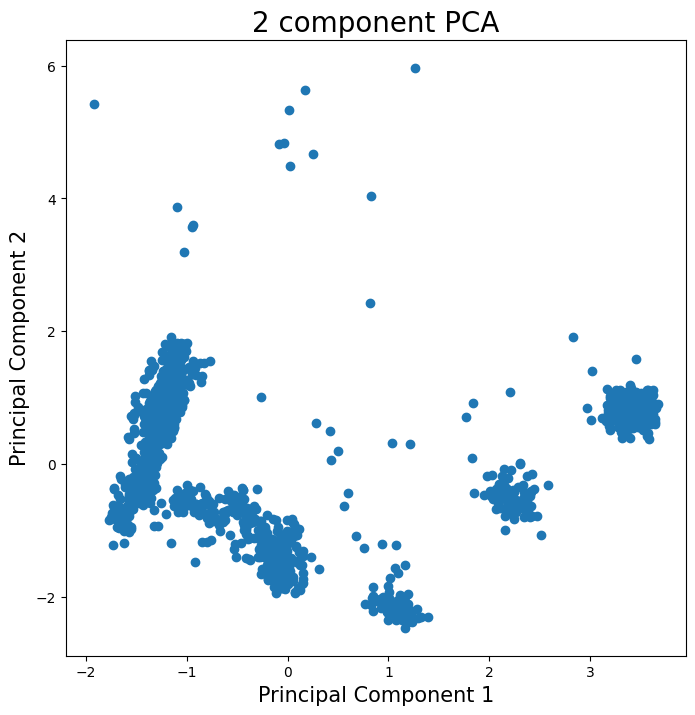

In [31]:
finalDf = pd.concat([pDf, df[['Higher_level_taxonomy']]], axis = 1)

# Plot:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

ax.scatter(finalDf[:]['pc1'], finalDf[:]['pc2'])
plt.savefig('PCA.png')

In [32]:
# You can check an eventual specific point of interest with
print(finalDf.iloc[100])

pc1                          -1.236703
pc2                           1.228572
Higher_level_taxonomy    Allosauroidea
Name: 100, dtype: object


Covariance matrix  (5, 5) 
 [[ 1.    0.75 -0.03  0.49  0.5 ]
 [ 0.75  1.    0.07  0.44  0.45]
 [-0.03  0.07  1.   -0.47 -0.47]
 [ 0.49  0.44 -0.47  1.    0.99]
 [ 0.5   0.45 -0.47  0.99  1.  ]]
Eigen vectors 
 [[-0.43511751 -0.44202464  0.37405218 -0.68944441 -0.00619232]
 [-0.40570572 -0.52209519  0.22819408  0.71463859 -0.00621547]
 [ 0.2529377  -0.65975758 -0.69813982 -0.11544599  0.00393431]
 [-0.53805496  0.22351573 -0.40710498 -0.018285   -0.70318473]
 [-0.54092051  0.2163134  -0.39354639 -0.01720389  0.71094217]]
Eigen values 
 [2.94424399 1.34862141 0.45418073 0.24304161 0.00991226] 

Sorted Eigen vectors 
 [[-0.43511751 -0.44202464  0.37405218 -0.68944441 -0.00619232]
 [-0.40570572 -0.52209519  0.22819408  0.71463859 -0.00621547]
 [ 0.2529377  -0.65975758 -0.69813982 -0.11544599  0.00393431]
 [-0.53805496  0.22351573 -0.40710498 -0.018285   -0.70318473]
 [-0.54092051  0.2163134  -0.39354639 -0.01720389  0.71094217]]
Sorted Eigen values 
 [2.94424399 1.34862141 0.45418073 0.243

Text(0.5, 1.0, 'Cumulative variance')

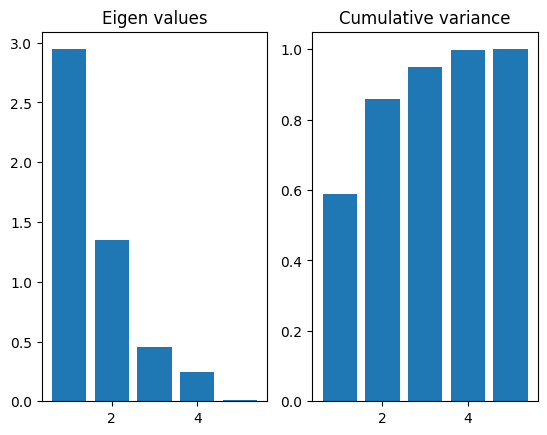

In [33]:
# Compute covariance matrix
cov = np.cov(x.T)
cov = np.round(cov, 2)
print("Covariance matrix ", cov.shape, "\n", cov)

# Perform eigen decomposition of covariance matrix
eig_val, eig_vec = np.linalg.eig(cov)
print("Eigen vectors \n", eig_vec)
print("Eigen values \n", eig_val, "\n")

# Sort eigen values and corresponding eigen vectors in descending order
indices = np.arange(0,len(eig_val), 1)
indices = ([x for _,x in sorted(zip(eig_val, indices))])[::-1]
eig_val = eig_val[indices]
eig_vec = eig_vec[:,indices]
print("Sorted Eigen vectors \n", eig_vec)
print("Sorted Eigen values \n", eig_val, "\n")

# Get explained variance
sum_eig_val = np.sum(eig_val)
explained_variance = eig_val/ sum_eig_val
print("Explained variance \n", explained_variance)
cumulative_variance = np.cumsum(explained_variance)
print("Cumulative variance \n", cumulative_variance)

# HISTOGRAMS
#define grid of plots
fig, axs = plt.subplots(nrows=1, ncols=2)
#create histograms
count= [1, 2, 3,  4, 5] 
axs[0].bar(count, eig_val)
axs[1].bar(count, cumulative_variance)
axs[0].set_title('Eigen values')
axs[1].set_title('Cumulative variance')

# K-means

In [34]:
########## K MEANS ##############
# K-means aims to minimize the sum of squared distances between data points and
# their respective cluster centroids.

# Function to plot the clusters
def plot_clusters(X, centers, labels, metodo):
    #Scatter plot of data points where each point is colored according to its assigned cluster
    plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis', alpha=0.7)
    #Scatter plot of cluster centers in red X
    plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(metodo)
    plt.show()

# Function to calculate the sum of squared distances (inertia)
def calculate_inertia(X, centers, labels):
    inertia = 0
    for i in range(len(centers)):
        inertia += np.sum((X[labels == i] - centers[i])**2)
        return inertia

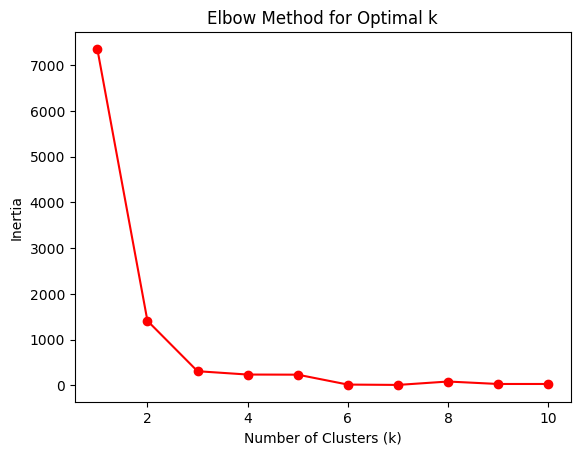

In [36]:
# Use the elbow method to find the optimal number of clusters
inertias = []
possible_k_values = range(1, 11)
for k in possible_k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=1) # Explicitly set n_init to 1
    kmeans.fit(x)
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_
    inertia = calculate_inertia(x, centers, labels)
    inertias.append(inertia)
# Plot the elbow curve
plt.plot(possible_k_values, inertias, marker='o', color = 'red')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


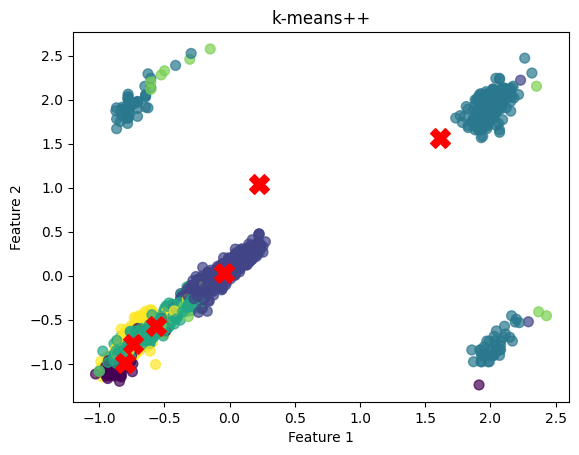

Inertia for k-means++ initialization: 16.34663130883692


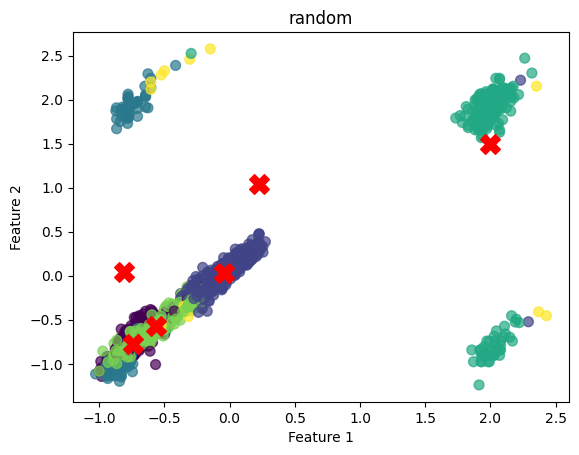

Inertia for random initialization: 82.98301610127623


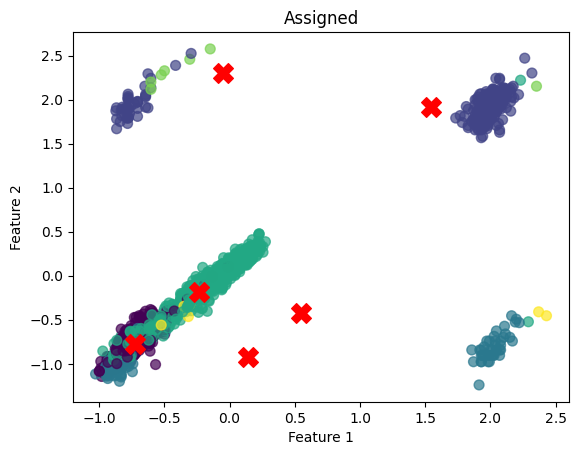

Inertia for [[ 0  0  0  0  0]
 [ 1  1  1  1  1]
 [ 2 -1 -1  2 -1]
 [-1 -1 -1 -1 -1]
 [ 3  3  3  3  3]
 [ 1  0  2  0  1]] initialization: 160.98195717766785


In [38]:
points=np.array([[0, 0, 0, 0, 0], [1, 1, 1, 1, 1],[2, -1, -1, 2, -1],[-1, -1, -1, -1, -1],[3,3,3,3,3],[1,0,2,0,1]])
initial_centroids = ['k-means++', 'random', points]
centroids_method = ['k-means++', 'random', 'Assigned']
X=x
for init, metodo in zip(initial_centroids, centroids_method):
    # Fit KMeans model
    kmeans = KMeans(n_clusters=6, init=init, random_state=42, n_init=1) #Explicitly set n_init to 1
    kmeans.fit(X)
    #Cluster assignments for each data point
    labels = kmeans.labels_
    #Cluster centroids
    centers = kmeans.cluster_centers_
    
    # Plot the clusters
    plot_clusters(X, centers, labels, metodo)
    # Calculate and print the inertia
    inertia = calculate_inertia(X, centers, labels)
    print(f'Inertia for {init} initialization: {inertia}')

# Clustering

In [39]:
########## CLUSTERING ###########

from scipy.spatial.distance import cdist

def update_distances(D,i,j, sizes): # calculate distances for merged cluster
    ''' Retrieves the size of the distance matrix D.'''
    n = D.shape[0]
    ''' Initializes an array d with infinity values for the new distances'''
    d = np.inf * np.ones(n+1)
    '''Iterates over all clusters to update distances.
    '''
    for k in range(n): # Update distances
        '''Calculates the new distance between the merged cluster
        and cluster k based on the formula for updating distances in␣ hierarchical clustering.'''
        d[k] = ((sizes[i]+sizes[k])*D[i,k] + (sizes[j]+sizes[k])*D[j,k] - sizes[k]*D[i,j])/(sizes[i] + sizes[j] + sizes[k])
    ''' Creates an array of infinity values for deactivating distances.'''
    infs = np.inf * np.ones(n) # array of infinity
    '''Deactivates distances related to clusters i and j by setting them to infinity.'''
    D[i,:],D[:,i],D[j,:],D[:,j] = infs,infs,infs,infs # deactivate
    ''' Initializes a new distance matrix new_D with infinity values.'''
    new_D = np.inf * np.ones((n+1,n+1))
    '''Copies the old distance matrix D into the upper-left part of new_D.'''
    1
    new_D[0:n,0:n] = D # copy old matrix into new_D
    '''Adds a new row and column to new_D containing the updated distances for the merged cluster.''' 
    new_D[-1,:], new_D[:,-1] = d,d # add new row and column
    '''Returns the updated distance matrix.'''
    return new_D
    


In [40]:
def agg_cluster(X):
    '''n is assigned the number of rows in the matrix X'''
    n = X.shape[0]
    '''sizes is initialized as an array of ones with length n.
    This array will be used to keep track of the size of each cluster
    during the hierarchical clustering process.'''
    sizes = np.ones(n)
    '''cdist computes the pairwise squared Euclidean distances between the rows of X.
    The result is a symmetric matrix D where D[i, j] is the squared
    Euclidean distance between row i and row j in X'''
    D = cdist(X, X,metric = 'sqeuclidean') # initialize distance matr.
    '''This sets the diagonal elements of the distance matrix D to infinity,
    ensuring that each point is not considered as the nearest neighbor to itself.'''
    np.fill_diagonal(D, np.inf * np.ones(D.shape[0]))
    ''' Initializes the linkage matrix Z with zeros.
    The matrix will have n-1 rows and 4 columns,
    where each row corresponds to a merge operation in the hierarchical clustering process.
    The columns store information about the indices of the clusters being merged and
    the distance between them.'''
    Z = np.zeros((n-1,4)) #linkage matrix encodes hierachy tree
    for t in range(n-1):
        ''' This line finds the indices i and j of the minimum value in the distance matrix D.
        These indices represent the pair of clusters with the smallest distance.
        '''
        i,j = np.unravel_index(D.argmin(), D.shape) # minimizer pair
        '''It appends the size of the newly formed cluster
        2
        (i.e., the sum of sizes of clusters i and j) to the sizes array.'''
        sizes = np.append(sizes, sizes[i] + sizes[j])
        '''This line updates the linkage matrix Z with information about the current merge operation.
        It stores the indices of clusters being merged (i and j),
        the distance between them, and the size of the new cluster.'''
        Z[t,:]=np.array([i, j, np.sqrt(D[i,j]), sizes[-1]])
        '''This function call updates the distance matrix D by modifying the entries related to clusters i and j based on their new size and the linkage criterion.'''
        D = update_distances(D, i,j, sizes) # update distance matr.
    return Z

cell runtime= 45.55400013923645 s


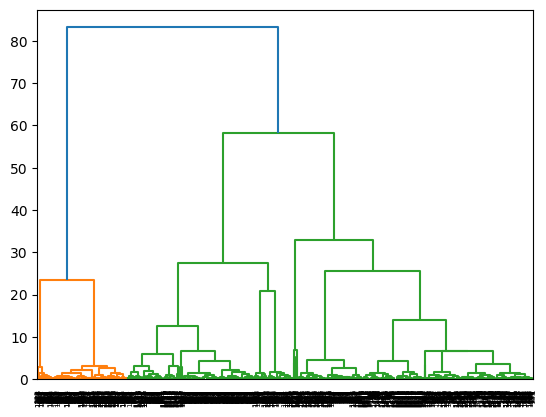

In [43]:
import scipy.cluster.hierarchy as h
start_time = time.time()
X=x
Z = agg_cluster(x) # form the linkage matrix from h of how clusters are merged

h.dendrogram(Z, get_leaves=True, orientation='top', labels=None, \
count_sort=False, distance_sort=False, \
show_leaf_counts=False, no_plot=False) 
# SciPy can produce a dendogram from Z

# fcluster function assigns cluster ids to all points based on Z
cl = h.fcluster(Z, criterion = 'maxclust', t=6) #assignes cluster IDS to all points based on Z

end_time=time.time()
print('cell runtime=', end_time - start_time, 's')

In [44]:
print(len(np.unique(cl)))

6


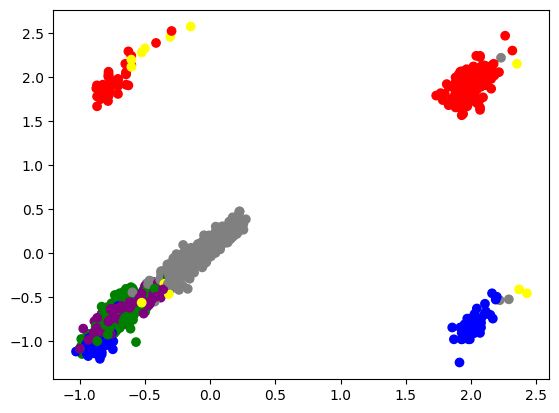

In [45]:
plt.figure(2), plt.clf()
cols = ['red','green','blue', 'yellow', 'purple', 'grey']
colors = [cols[i-1] for i in cl]
plt.scatter(X[:,0], X[:,1], c=colors)
plt.show()

# Machine learning

In [87]:
########### LDA ###############

# https://python-course.eu/machine-learning/linear-discriminant-analysis-in-python.php
from matplotlib import style
from sklearn.model_selection import train_test_split
style.use('fivethirtyeight')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.mixture import GaussianMixture
from sklearn.pipeline import make_pipeline

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42) 

# 1. Instantiate the method and fit_transform the algotithm
lda = LinearDiscriminantAnalysis(n_components=3) 
# The n_components key word gives us the projection to the n  most 
# discriminative directions in the dataset. We set this parameter to two to get a 
# transformation in two dimensional space.  
X_train = lda.fit_transform(X_train, y_train.ravel())
X_test = lda.transform(X_test)


In [88]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=6, random_state=0)
classifier.fit(X_train, y_train.ravel())
y_pred = classifier.predict(X_test)

print('I can take a random element like {0} \n check it is a {1} \n and has been predicted as {2}'.
      format(X_test[-2], y_test[-2], y_pred[-2]))


I can take a random element like [2.08521219 0.58030692 1.69508859] 
 check it is a ['Maniraptora'] 
 and has been predicted as Maniraptora


[[ 21   3   0   0   0   3]
 [  7  11   0   6   0   1]
 [  0   0   1   1   0   0]
 [  0   2   1 182   0   1]
 [ 10   0   0   2   2   2]
 [  7   4   0   4   0  24]]
                  precision    recall  f1-score   support

   Allosauroidea       0.47      0.78      0.58        27
    Ceratosauria       0.55      0.44      0.49        25
  Coelophysoidea       0.50      0.50      0.50         2
     Maniraptora       0.93      0.98      0.96       186
 Megalosauroidea       1.00      0.12      0.22        16
Tyrannosauroidea       0.77      0.62      0.69        39

        accuracy                           0.82       295
       macro avg       0.70      0.57      0.57       295
    weighted avg       0.84      0.82      0.80       295

Accuracy 0.8169491525423729


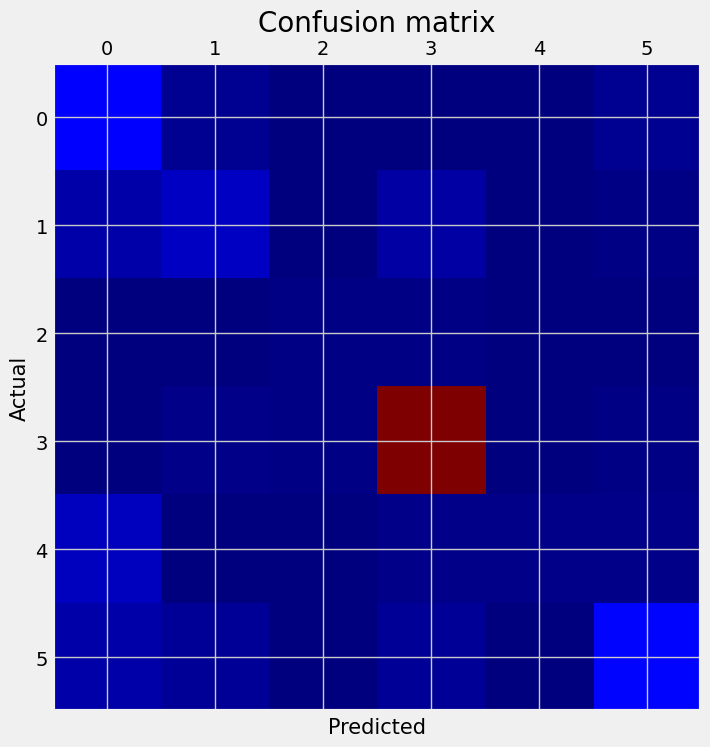

In [89]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

#Confusion Matrix: when we need to know how much samples we got right or wrong for each class
#The values that were correct and correctly predicted are called true positives, 
#the ones that were predicted as positives but weren't positives are called false positives
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test,y_pred))

#Accuracy: describes how many predictions our classifier got right. The lowest accuracy value is 0 and the highest is 1
print('Accuracy ' + str(accuracy_score(y_test, y_pred)))

from matplotlib import colormaps
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Predicted', fontsize = 15)
ax.set_ylabel('Actual', fontsize = 15)
ax.set_title('Confusion matrix', fontsize = 20)
fig= plt.matshow(cm, fignum=0,cmap='jet')

# Prediction: UK data

The UK Bathonian dataset contains 93 new theropod teeth still not classified.
The machine learning LDA model trained on the full dataset from before is now able to classify raw data.
The latter will be analyzed in the same way as before:

In [5]:
##############################################
#################### MAIN ####################
##############################################

######### IMPORT DATA #############

if __name__ == '__main__':
    start_time = time.time()
    program_path = os.getcwd()+'/'
    print('working directory: ', program_path)
    # defining the paths
#    INPUT_PATH = program_path + 'INPUT/'
#    OUTPUT_PATH = program_path + 'OUTPUT/'
    # Read the Excel file
    df2 = pd.read_csv('UKBathonianTeeth.csv')
#    df = pd.read_excel('fulldataset.xlsx')

    # Get the header (column names) of the DataFrame
    header2 = df2.columns
    print('your type header is: ', type(header2))
    # print('your header is: ', header)
    # Convert the header to a list
    # header.tolist() converts the Index object to a list of column names
    header_list2 = header2.tolist()
    # Print the list of column names
    print('your header is: ', header_list2)
    
     # Extracting the variables for the dataframe
    ID2 = df2['ID'].values
    print("ID=", ID2)
    
    leng2=df2[df2.columns[0]].count()
    print("There are ", leng2, "rows" )
    
    end_time=time.time()
    print('runtime=', end_time - start_time, 's')

working directory:  /drive/notebooks/
your type header is:  <class 'pandas.core.indexes.base.Index'>
your header is:  ['ID', 'SPECIMENID', 'CBL', 'CH', 'CBW', 'ADM', 'PDM', 'Original_Taxon', 'Clade', 'Clade1', 'Clade2', 'Combined_clade', 'Higher_level_taxonomy', 'Data_Source', 'Reference', 'Period', 'Lower_Stage', 'Upper_Stage', 'Group', 'Formation', 'Member', 'Max_ma', 'Min_ma', 'Mid_ma', 'Lat', 'Long', 'P_lat', 'P_Lon', 'Locality']
ID= [  3  10  11  19  21  22  23  25  26  27  28  29  31  32  33  34  35  36
  37  38  39  40  42  43  44  45  46  48  49  50  51  52  53  54  55  56
  58  59  60  62  63  64  66  68  69  72  74  76  77  79  80  81  82  84
  85  92  93  94  95  98 101 102 103 104 105 106 107 108 109 110 111 112
 113 114 119 123 124 125 127 128 129 130 131 132 134 137 138 139 140 141
 142 146 149]
There are  93 rows
runtime= 0.026999950408935547 s


In [7]:
print('This is your full dataset:')
print(df2)
df2.info()

This is your full dataset:
     ID        SPECIMENID   CBL    CH   CBW    ADM        PDM Original_Taxon  \
0     3  NHMUK PV R 36771  2.38  3.37  1.20  10.00   7.700000   Watton Cliff   
1    10  NHMUK PV R 36778  1.94  4.10  1.74   5.78   6.360000   Watton Cliff   
2    11  NHMUK PV R 36779  1.27  2.16  0.72  15.20  13.000000   Watton Cliff   
3    19              WD21  1.96  2.96  0.65  12.00   8.695652      Woodeaton   
4    21              WD23  2.18  5.12  1.81   9.68   5.681818      Woodeaton   
..  ...               ...   ...   ...   ...    ...        ...            ...   
88  140          GCM_8-23  2.29  2.87  0.98   6.38   4.860000    Hornsleasow   
89  141         GCM_14-22  3.10  3.50  1.62   7.25   6.756757    Hornsleasow   
90  142        GCM_167-32  2.54  3.45  1.74   6.11   6.134969    Hornsleasow   
91  146        GCM_G72603  3.95  7.73  2.46   0.00   0.000000    Hornsleasow   
92  149       GCM 7.219-3  4.75  6.44  2.36   5.71   4.694836    Hornsleasow   

           C

In [93]:

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
features = ['CBL', 'CH', 'CBW', 'ADM', 'PDM']

# Separating out the data we want to use
UKx = df2.loc[:, features].values
print('Initial data \n', UKx)
print(type(UKx), 'dim:', np.ndim(UKx), 'size:', np.size(UKx), 'shape:', UKx.shape)

# Create log-transformed data
UKx= np.log1p(UKx)
# Standardizing the features
UKx = StandardScaler().fit_transform(UKx)
print('Final standard deviation:', np.std(UKx))

# Separating out the target
UKy = df2.loc[:,['Higher_level_taxonomy']].values

Initial data 
 [[ 2.38        3.37        1.2        10.          7.7       ]
 [ 1.94        4.1         1.74        5.78        6.36      ]
 [ 1.27        2.16        0.72       15.2        13.        ]
 [ 1.96        2.96        0.65       12.          8.69565217]
 [ 2.18        5.12        1.81        9.68        5.68181818]
 [ 1.65        2.5         0.83        7.14        6.75675676]
 [ 2.39        6.03        2.26        8.47        8.33333333]
 [ 1.4         1.98        0.7         0.          8.64197531]
 [ 1.28        2.9         0.94        0.          0.        ]
 [ 0.94        1.97        0.58        0.          0.        ]
 [ 4.35        7.4         1.71       11.11        5.68181818]
 [ 1.04        1.76        0.56        0.          0.        ]
 [ 1.6         2.56        0.89       15.38       16.66666667]
 [ 1.43        1.66        0.72        9.09       10.41666667]
 [ 1.27        2.35        0.75        0.          0.        ]
 [ 1.42        2.63        0.81        5

In [90]:
UKx_test = lda.transform(UKx)
y_predUK = classifier.predict(UKx_test)

In [91]:
# Check which different taxon are considered
taxon_unique2, counts2= np.unique(y_predUK, return_counts = True)
print("There are {0} taxon in the dataset: \n {1} \n Each is present {2} times".format(len(taxon_unique2), taxon_unique2, counts2))

There are 4 taxon in the dataset: 
 ['Allosauroidea' 'Ceratosauria' 'Maniraptora' 'Tyrannosauroidea'] 
 Each is present [ 1  1 72 19] times


In [92]:
names2 = pd.DataFrame(
    {"kind": y_predUK}
)
print(names2.to_string())

# Assigning a different number to each taxon
names2.kind=pd.Categorical(names2.kind)
numbers2=names2.kind.cat.codes #type:pd series
numb2=numbers2.to_frame() #turns into dataframe

                kind
0        Maniraptora
1        Maniraptora
2        Maniraptora
3        Maniraptora
4   Tyrannosauroidea
5        Maniraptora
6   Tyrannosauroidea
7        Maniraptora
8        Maniraptora
9        Maniraptora
10       Maniraptora
11       Maniraptora
12       Maniraptora
13       Maniraptora
14       Maniraptora
15       Maniraptora
16       Maniraptora
17       Maniraptora
18       Maniraptora
19       Maniraptora
20       Maniraptora
21  Tyrannosauroidea
22       Maniraptora
23       Maniraptora
24      Ceratosauria
25     Allosauroidea
26       Maniraptora
27       Maniraptora
28       Maniraptora
29       Maniraptora
30       Maniraptora
31       Maniraptora
32       Maniraptora
33       Maniraptora
34       Maniraptora
35  Tyrannosauroidea
36       Maniraptora
37       Maniraptora
38       Maniraptora
39       Maniraptora
40  Tyrannosauroidea
41       Maniraptora
42  Tyrannosauroidea
43       Maniraptora
44       Maniraptora
45       Maniraptora
46       Mani